# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。



In [332]:
import numpy as np

def logistic_hypothesis(X):
    np.random.seed(0)
    theta = np.random.rand(1,X.shape[1])
    hypothesis = 1/(1 + np.exp(-1 * (np.dot(X, theta.T))))
    return hypothesis

In [333]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

logistic_hypothesis(X).ravel()

ones = np.ones((1,1))
theta = np.random.rand(1,X.shape[1])
theta = np.insert(theta, 0, ones, axis=1).reshape(-1,1)

theta

array([[1.        ],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ]])

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。




In [334]:
def predict(X):
    pred = logistic_hypothesis(X)
    pred = np.where(pred < 0.5, 0, 1)
    return pred

predict(X_train).ravel()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [335]:
def predict_proba(X):
    pred_0 = 1- logistic_hypothesis(X)
    pred_1 = logistic_hypothesis(X)
    pred_proba = np.hstack([pred_0, pred_1])
    return pred_proba

predict_proba(X_test)

array([[8.68298478e-05, 9.99913170e-01],
       [5.07860087e-05, 9.99949214e-01],
       [2.11383242e-05, 9.99978862e-01],
       [2.11881591e-04, 9.99788118e-01],
       [2.62677388e-04, 9.99737323e-01],
       [3.61152393e-04, 9.99638848e-01],
       [1.21392045e-04, 9.99878608e-01],
       [2.08969845e-05, 9.99979103e-01],
       [1.08076884e-03, 9.98919231e-01],
       [5.96996425e-05, 9.99940300e-01],
       [2.02246650e-04, 9.99797753e-01],
       [4.87954129e-04, 9.99512046e-01],
       [8.93494038e-05, 9.99910651e-01],
       [1.04126635e-04, 9.99895873e-01],
       [2.54866048e-05, 9.99974513e-01],
       [1.05167159e-04, 9.99894833e-01],
       [9.33344552e-05, 9.99906666e-01],
       [8.04607388e-05, 9.99919539e-01],
       [4.00564818e-04, 9.99599435e-01],
       [5.47261484e-04, 9.99452739e-01],
       [1.07666791e-05, 9.99989233e-01],
       [9.02801142e-05, 9.99909720e-01],
       [8.35014786e-05, 9.99916499e-01],
       [3.01173148e-04, 9.99698827e-01],
       [1.669850

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。


In [336]:
def cost_function(X, y,lamda=0.01):
    theta = np.random.rand(1,X.shape[1])
    y = y.reshape(-1,1)
    cross_entropy = (1/X.shape[0]) * np.sum((-y * np.log(logistic_hypothesis(X))) - ((1- y) * np.log(1-logistic_hypothesis(X))))
    regularization_term = lamda/2*X.shape[0] * np.sum(theta**2)
    cost_loss =  (cross_entropy + regularization_term).tolist()
    return cost_loss

cost_function(X_test, y_test)
#(-y * np.log(logistic_hypothesis(X))).shape

4.8977907443338955

In [337]:
# 検証用に調べたが、あまり間違っていなさそう。
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LogisticRegression().fit(X_train, y_train)
pred_sklearn = model.predict(X_test)
pred_sklearn

log_loss(y_test, pred)

19.342162555710892

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [373]:
# 合体版
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lamda = 0.001
        self.list_train_loss = []
        self.list_val_loss = []
        
    # 問題１    
    def _logistic_hypothesis(self, X):
        z = np.dot(X, self.theta.T)
        y_hot = 1/(1 + np.exp(-z))
        return y_hot

    # 問題2
    def fit(self, X, y, X_val, y_val):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(1,X.shape[1])

        # バイアスをthetaとX, X_valに追加
        if self.bias:
            X = np.insert(X, 0,1, axis=1)
            X_val = np.insert(X_val, 0, 1, axis=1) ###相違点
            self.theta = np.insert(self.theta, 0, 1, axis=1)
        
        # 訓練データを勾配計算からpredict〜cost_functionを計算
        for i in range(self.iter):
            error = self._logistic_hypothesis(X)  
            self._gradient_descent(X, error, y)
           # y_pred = self.predict_proba(X)[:,1]
            loss, _ = self.cost_function(X, y, error)
            self.list_train_loss.append(loss)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print("{}/{}, train_loss {}".format(i+1, self.iter, loss))
        

        # テストデータを勾配計算からpredict〜cost_functionを計算
        if X_val is not None and y_val is not None:
            for i in range(self.iter):
                error = self._logistic_hypothesis(X_val) 
                self._gradient_descent(X_val, error, y_val)
                #y_val_pred = self.predict_proba(X_val)[:, 1]
                _, val_loss = self.cost_function(X_val, y_val, error)
                self.list_val_loss.append(val_loss)
        
                if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                    print("{}/{}, test_loss {}".format(i+1, self.iter, val_loss))
             
            
    # 問題3
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """ 
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)    
            
        pred = self._logistic_hypothesis(X)
        pred = np.where(pred < 0.5, 0, 1)
        return pred
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)  
        
        pred_0 = 1- self._logistic_hypothesis(X)
        pred_1 = self._logistic_hypothesis(X)
        pred_proba = np.hstack([pred_0, pred_1])
        return pred_proba
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        y = y.reshape(-1,1)
        new_error = error - y
        new_erro = new_error.reshape(-1,1)
        self.theta = self.theta - (self.lr*np.dot(X.T, new_error)) + (self.lamda*self.theta)/X.shape[0]
        return self.theta


    
    # 問題4
    def cost_function(self, X,y, y_pred):
        cross_entropy = 1/X.shape[0] * np.sum(-y * np.log(y_pred) - (1- y) * np.log(1-y_pred))
        regularization_term = self.lamda * np.sum(self.theta**2) / 2*X.shape[0]
        cost_loss =  cross_entropy + regularization_term
        self.loss = cost_loss
        self.val_loss = cost_loss
        return self.loss, self.val_loss


In [339]:
theta = np.random.rand(1,X.shape[1])
theta

a = np.arange(0,9).reshape(3,3)
b = np.arange(0,9).reshape(3,3)

print(np.sum(a*b))
print(a@b)
X[0]


204
[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]


array([7. , 3.2, 4.7, 1.4])

In [374]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score, confusion_matrix

model_scratch = ScratchLogisticRegression(1000, 0.001, True, True)
model_scratch.fit(X_train, y_train, X_test, y_test)


1/1000, train_loss 371.98804185155063


ValueError: operands could not be broadcast together with shapes (75,) (75,5) 

In [349]:
# 評価の確認
pred = model_scratch.predict(X_test)
pred_proba = model_scratch.predict_proba(X_test)[:, 1]

print(pred.ravel())
print(pred_proba)
print("-"*50)
# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

# スクラッチのクロスエントロピー
_, cost = model_scratch.cost_function(X_test, y_test, pred_proba)
print("log loss: {}".format(cost))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.99999083 0.99999079 0.99999299 0.99999508 0.99999861 0.99983059
 0.99996835 0.99999927 0.99993073 0.99996335 0.99999324 0.99999195
 0.99998162 0.9999818  0.99982532 0.99992929 0.99998517 0.99998177
 0.99998412 0.99998761 0.99983567 0.99999907 0.99993778 0.99999571
 0.99999298]
--------------------------------------------------
[[ 0  0]
 [14 11]]
0.44
1.0
0.44
0.6111111111111112
log loss: 155.8747722855166


In [254]:
# sklearnのロジスティック回帰と比較する
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

model = LogisticRegression().fit(X_train, y_train)
pred_sk = model.predict(X_test)
pred_sk_proba = model.predict_proba(X_test)[:,1]

# predとprobaの確認
print(pred_sk)
print(pred_sk_proba)

# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

# sklearnのクロスエントロピー

log_loss(y_test, pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1]
[0.54645183 0.89594754 0.95960762 0.05054654 0.07560458 0.05182233
 0.45569541 0.97205303 0.01100832 0.17350702 0.25509376 0.0213071
 0.58417041 0.63124837 0.96149306 0.22305241 0.5059302  0.54943092
 0.02981109 0.01313685 0.99445254 0.48639945 0.272587   0.03704218
 0.58968991]
[[9 6]
 [5 5]]
0.56
0.45454545454545453
0.5
0.47619047619047616


15.197221533246738

# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。


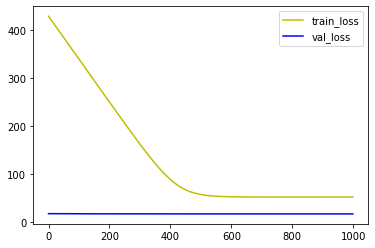

'\n考察\nvalはほとんど誤差に変化がないが、、、\n計算が正しいという前提の元でいうと\n訓練データと比べてテストデータが低いので、汎化性が高いと言える\n（※計算があっているのか？）\n'

In [238]:
import matplotlib.pyplot as plt

plt.plot(range(1000), model_scratch.list_train_loss, c='y', label='train_loss')  
plt.plot(range(1000), model_scratch.list_val_loss, c='b', label='val_loss')
plt.legend()
plt.show()

'''
考察
valはほとんど誤差に変化がないが、、、
計算が正しいという前提の元でいうと
訓練データと比べてテストデータが低いので、汎化性が高いと言える
（※計算があっているのか？）
'''

# 【問題7】決定領域の可視化
決定領域を可視化してください。


In [239]:
iris = load_iris()
X = pd.DataFrame(iris.data[50:150], columns=iris.feature_names)
y = pd.DataFrame(iris.target[50:150], columns=['target'])
X = X.loc[:, ["sepal length (cm)", "petal length (cm)"]]
df = pd.concat([X,y], axis=1)
df[df['target'] == 1].iloc[:, 0]

0     7.0
1     6.4
2     6.9
3     5.5
4     6.5
5     5.7
6     6.3
7     4.9
8     6.6
9     5.2
10    5.0
11    5.9
12    6.0
13    6.1
14    5.6
15    6.7
16    5.6
17    5.8
18    6.2
19    5.6
20    5.9
21    6.1
22    6.3
23    6.1
24    6.4
25    6.6
26    6.8
27    6.7
28    6.0
29    5.7
30    5.5
31    5.5
32    5.8
33    6.0
34    5.4
35    6.0
36    6.7
37    6.3
38    5.6
39    5.5
40    5.5
41    6.1
42    5.8
43    5.0
44    5.6
45    5.7
46    5.7
47    6.2
48    5.1
49    5.7
Name: sepal length (cm), dtype: float64

[[4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]
 [4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]
 [4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]
 ...
 [4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]
 [4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]
 [4.9        4.96122449 5.02244898 ... 7.77755102 7.83877551 7.9       ]]


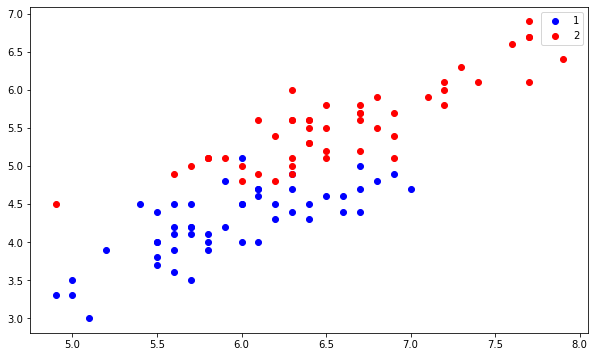

In [240]:

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1].iloc[:, 0], df[df['target'] == 1].iloc[:, 1], color='b', label='1')
plt.scatter(df[df['target'] == 2].iloc[:, 0], df[df['target'] == 2].iloc[:, 1], color='r', label='2')
plt.legend()

x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max(),
x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
print(xx1)
grid = np.c_[xx1.ravel(), xx2.ravel()]
#probs = model.predict_proba(grid).reshape(xx1.shape)
#plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')
#plt.show()


In [ ]:
graph(X_train, y_train)

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
decision_region(X_train, y_train, model)

ValueError: shapes (109200,3) and (5,75) not aligned: 3 (dim 1) != 5 (dim 0)

# 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。


pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント


numpy.savez — NumPy v1.17 Manual
